# Global Configurations

# Initialization

In [1]:
USING_GPU = False

CASE_TYPE = 'short'

noCases = 16
noSelections = 8

LABEL_TYPE = 'hard'

SOFT_TYPE = 'normal'

DATA_USING = 'H'

INPUT_SHAPE = 'HTH-1D'

INPUT_NORMALIZE = True


# HOME_DIR 설정
HOME_DIR = 'D:/Work/Research/AI/wireless/' # 'M:/Archive/Google Drive/'   

SOURCE_CODE_DIR = HOME_DIR + '' # 'Archive/Source Codes/Jupyter/Antenna Selection Exp02/'

DB_DIR = SOURCE_CODE_DIR + 'Pickle/' # 'C:\Digital Data\Data/'

LOG_DIR = SOURCE_CODE_DIR + 'Logs/'
MODEL_DIR = SOURCE_CODE_DIR + 'Models/'
WEIGHT_DIR = SOURCE_CODE_DIR + 'Weights/'
HISTORY_DIR = SOURCE_CODE_DIR + 'History/'

IS_TRAIN_DATA_NORMALIZATION = False       

ADDITIONAL_STRING = ' mMIMO FC ' + DATA_USING + ' ' + LABEL_TYPE + ' ' + CASE_TYPE

IS_REALTIME_PRECISION = True

print(CASE_TYPE + '-' + LABEL_TYPE + '-' + SOFT_TYPE)
print('Additional String : |' + ADDITIONAL_STRING + '|') 
print('select ' + str(noSelections) + ' of ' + str(noCases))
print(INPUT_SHAPE)

short-hard-normal
Additional String : | mMIMO FC H hard short|
select 8 of 16
HTH-1D


##### Set of Experiments (ONLY for FULLY-CONNECTED NETWORK)

In [7]:
!pip install tensorflow

In [8]:
import numpy as np
import scipy.io as sio
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.python.client import device_lib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation

import pickle

import os

import datetime

import time

if USING_GPU == False:
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
    print('*** GPU DISABLED" ***')

print(tf.__version__)
print(device_lib.list_local_devices())

*** GPU DISABLED" ***
2.16.1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12681280993614524293
xla_global_id: -1
]


# Data Loading


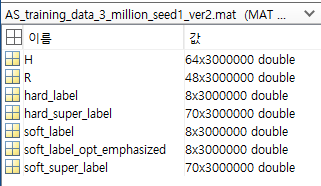

## Load Input File from pickle

In [9]:
from dataclasses import dataclass, field
from typing import List

@dataclass
class ExperimentSetting:
    IS_REGULARIZER: bool
    REGULARIZER_TYPE: str
    REGULARIZER_RATE: float
    KER_REGULARIZER: object
    BIAS_REGULARIZER: object
    IS_BATCH_NORMALIZATION: bool
    
    NETWORK_LAYERS: List[int]
    NETWORK_NAME: str
    
    INITIALIZER: str
    ACTIVATION: str
    FINAL_ACTIVATION: str
    
    OPTIMIZER_NAME: str
    LEARNING_RATE: float
    OPTIMIZER: object
    
    BATCH_SIZE: int
    VALIDATION_SPLIT: float
    NO_EPOCH: int

expSet = []

NN_LAY2_491 = [491, 491]


regularizer_rate = 1e-5

if LABEL_TYPE == 'hard' and CASE_TYPE == 'short':
    final_act = 'sigmoid'
else:
    final_act = 'softmax'

    
expSet.append(
    ExperimentSetting(
    IS_REGULARIZER = False,
    REGULARIZER_TYPE = 'L1',
    REGULARIZER_RATE = regularizer_rate,
    KER_REGULARIZER = regularizers.L1(regularizer_rate),
    BIAS_REGULARIZER = regularizers.L1(regularizer_rate),        
    IS_BATCH_NORMALIZATION = True,
    
    NETWORK_LAYERS = NN_LAY2_491,
    NETWORK_NAME = 'NN_LAY2_491',
    
    INITIALIZER = 'he_normal',
    ACTIVATION = 'relu',
    FINAL_ACTIVATION = final_act,
    
    OPTIMIZER_NAME = 'Adam',
    LEARNING_RATE = 0.005,
    OPTIMIZER = tf.keras.optimizers.Adam(),
        
    BATCH_SIZE = 1000,
    VALIDATION_SPLIT = 0.2,
    NO_EPOCH = 25))


def float_to_string(float_number):

    if (float_number == 1e-5):
        return '1e-5'
    elif (float_number == 1e-4):
        return '1e-4'
    elif (float_number == 1e-6):
        return '1e-6'
    elif (float_number == 1e-7):
        return '1e-7'
    elif (float_number == 1e-8):
        return '1e-8'
    else:
        return 'none'
    
    
print(final_act)

sigmoid


## Assign Train and Test Data

In [10]:
file_name_head = "mMIMO_AS_training_data_20000_80_"
file_name_tail = ".pickle"

pickle_H_HTH_ORG_1D = file_name_head + "H_HTH_ORG_1D" + file_name_tail
pickle_labelVal = file_name_head + "labelVal" + file_name_tail
pickle_labelVal01 = file_name_head + "labelVal01" + file_name_tail

pickle_dir_data = DB_DIR + pickle_H_HTH_ORG_1D
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    H_inputVal_all = pickle.load(f)

pickle_dir_data = DB_DIR + pickle_labelVal
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    labelVal_all = pickle.load(f)

pickle_dir_data = DB_DIR + pickle_labelVal01
print(pickle_dir_data)
with open(pickle_dir_data, 'rb') as f:
    labelVal01_all = pickle.load(f)

D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_80_H_HTH_ORG_1D.pickle
D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_80_labelVal.pickle
D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_80_labelVal01.pickle


In [15]:
no_dataInFile = 20000

############# Training DATA

no_testDataFiles = 78
no_totalData = no_dataInFile * (no_testDataFiles)

if DATA_USING == 'R':
    inputSize = 192     # 2 * 2 * 2 * 2 * 2 * 2 * 3
    inputVal = R_inputVal_all[:no_totalData,:]
elif DATA_USING == 'H':
    inputSize = 256
    inputVal = H_inputVal_all[:no_totalData,:]

labelVal = labelVal_all[:no_totalData,:]
labelVal01 = labelVal01_all[:no_totalData,:]

############# Test DATA

no_valDataFiles = 2
no_totalValData = no_dataInFile * no_valDataFiles


if DATA_USING == 'R':
    inputSize = 192     # 2 * 2 * 2 * 2 * 2 * 2 * 3
    testInputVal = R_inputVal_all[no_totalData:,:]
elif DATA_USING == 'H':
    inputSize = 256
    testInputVal = H_inputVal_all[no_totalData:,:]

if INPUT_SHAPE == 'H-ARI-1D':
    inputSize = 384
    
testLabelVal = labelVal_all[no_totalData:,:]
testLabelVal01 = labelVal01_all[no_totalData:,:]

In [16]:
print(no_totalData)
print(no_totalValData)

if DATA_USING == 'R':
    print(R_inputVal_all.shape)
elif DATA_USING == 'H':
    print(H_inputVal_all.shape)
print(labelVal_all.shape)
print(labelVal01_all.shape)

print('====== INPUT(' + DATA_USING + ') : ' + str(inputVal.shape) + ' ' + str(inputSize))
print(inputVal)
print('====== LABEL : ' + str(labelVal.shape))
print(labelVal)
print('====== LABEL01 : ' + str(labelVal01.shape))
print(labelVal01)

print('================================================')

print('====== TEST INPUT(' + DATA_USING + ') : ' + str(testInputVal.shape) + ' ' + str(inputSize))
print(inputVal)
print('====== TEST LABEL : ' + str(testLabelVal.shape))
print(testLabelVal)
print('====== TEST LABEL01 : ' + str(testLabelVal01.shape))
print(testLabelVal01)

1560000
40000
(1600000, 256)
(1600000, 16)
(1600000, 16)
====== INPUT(H) : (1560000, 256) 256
[[0.43508627 0.23848953 0.17430991 ... 0.1494573  0.30463561 0.75840547]
 [0.91201586 0.14239275 0.35888622 ... 0.19680358 0.33829332 0.82588916]
 [0.38958044 0.19529653 0.12486362 ... 0.25814239 0.1255808  0.33462105]
 ...
 [0.2864378  0.2310919  0.14119503 ... 0.06365318 0.0519114  0.33934222]
 [0.92569351 0.22256976 0.21577545 ... 0.28583585 0.17893457 0.73793588]
 [0.57095904 0.11634311 0.03737261 ... 0.03271034 0.02874345 0.48409718]]
====== LABEL : (1560000, 16)
[[0.04384313 0.05183032 0.07402939 ... 0.07402939 0.05051586 0.07402939]
 [0.04217359 0.02302756 0.0729369  ... 0.07109003 0.0729369  0.0729369 ]
 [0.06612287 0.07401018 0.05073263 ... 0.07401018 0.07401018 0.02408138]
 ...
 [0.0699337  0.04693798 0.06201793 ... 0.0699337  0.0699337  0.04982493]
 [0.08032117 0.08032117 0.08032117 ... 0.08032117 0.04618059 0.08032117]
 [0.07990972 0.02283044 0.07990972 ... 0.07990972 0.02191744 0.

## Prepare for Data and Metrics 

In [17]:
from sklearn.preprocessing import StandardScaler

if IS_TRAIN_DATA_NORMALIZATION:
    scaler = StandardScaler() # 정규화
    train_X_all = tf.convert_to_tensor(scaler.fit_transform(inputVal), dtype='float32')
else:
    train_X_all = tf.convert_to_tensor(inputVal)
    print('no scaling')
    
#train_Y = tf.convert_to_tensor(opt_precoder_idx)

train_Y_all = tf.convert_to_tensor(labelVal)
train_Y_01_all = tf.convert_to_tensor(labelVal01) 

########################################


if IS_TRAIN_DATA_NORMALIZATION:
    scaler = StandardScaler() # 정규화
    test_X_all = tf.convert_to_tensor(scaler.fit_transform(testInputVal), dtype='float32')
else:
    test_X_all = tf.convert_to_tensor(testInputVal)
    print('no scaling')
    
#train_Y = tf.convert_to_tensor(opt_precoder_idx)
test_Y_all = tf.convert_to_tensor(testLabelVal)
test_Y_01_all = tf.convert_to_tensor(testLabelVal01)

no scaling
no scaling


In [18]:
# for indenendent validation
from sklearn.model_selection import train_test_split

train_X = train_X_all
train_Y = train_Y_01_all

test_X = test_X_all
test_Y = test_Y_01_all

print('Train : Test = ' + str(train_X.shape[0]) + ' : ' + str(test_X.shape[0]))

Train : Test = 1560000 : 40000


## Model Setting

## For Fully Connected

In [19]:
modelSet = []

for idx, expSetting in enumerate(expSet):
    
    model = Sequential()

    no_layers = 0

    for no_nodes in expSetting.NETWORK_LAYERS:

        if no_layers == 0:
            model.add(Dense(no_nodes,  kernel_initializer=expSetting.INITIALIZER,  
                            input_shape=(inputSize,), use_bias = False))

        else :
            model.add(Dense(no_nodes,  kernel_initializer=expSetting.INITIALIZER, 
                            use_bias = False))

        if expSetting.IS_BATCH_NORMALIZATION:
            model.add(BatchNormalization())

        model.add(Activation(expSetting.ACTIVATION))

        no_layers = no_layers + 1

    model.add(Dense(noCases, kernel_initializer=expSetting.INITIALIZER, use_bias = False))            

    if expSetting.IS_BATCH_NORMALIZATION:
        model.add(BatchNormalization())

    model.add(Activation(expSetting.FINAL_ACTIVATION))        

    model.summary()    
    
    modelSet.append(model)    

'''
model = Sequential()

# layer 1
model.add(Dense(491,  kernel_initializer='he_normal',  
                input_shape=(inputSize,), use_bias = False))

model.add(BatchNormalization())

model.add(Activation('relu'))

# layer 2
model.add(Dense(491,  kernel_initializer='he_normal', 
                use_bias = False))

model.add(BatchNormalization())

model.add(Activation('relu'))

# layer 3
model.add(Dense(16, kernel_initializer='he_normal', use_bias = False))            

model.add(BatchNormalization())

model.add(Activation('sigmoid'))        

'''

D:\Software\Users\khchoi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 491)                 │         125,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 491)                 │           1,964 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 491)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 491)                 │         241,081 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 491)                 │           1,964 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 491)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           7,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,625 (1.44 MB)

 Trainable params: 376,629 (1.44 MB)

 Non-trainable params: 1,996 (7.80 KB)

## Learning Fully-Connected

### Top-100 preparing

In [20]:
import math

targetDataFile = [79, 80]
top_interested = 100

top100_ranking = np.zeros((len(targetDataFile)*20000, top_interested), np.uint16)

totalIdx = 0

for fileIdx in targetDataFile:
    pickleRanking = "mMIMO_AS_training_data_20000_seed" + str(fileIdx) + "_ver2_sorted_ranking.pickle"
    pickleRanking_path = DB_DIR + pickleRanking
    
    with open(pickleRanking_path, 'rb') as f:
        loadRanking = pickle.load(f)

    print(loadRanking[0])        
    print('File Loading Done: ' + pickleRanking_path)

    for i in range(20000):
        for j in range(top_interested):
            top100_ranking[totalIdx][j] = loadRanking[i][j]
        totalIdx += 1


print(top100_ranking)

positionAccIdx = np.array([0, 1, 9, 17, 45, 53, 81, 109, 165, 173, 201, 229, 285, 313, 369, 425, 495, 503, 531, 559, 615, 643, 699, 755, 825, 853, 909, 965, 1035, 1091, 1161, 1231, 1287, 1295, 1323, 1351, 1407, 1435, 1491, 1547, 1617, 1645, 1701, 1757, 1827, 1883, 1953, 2023, 2079, 2107, 2163, 2219, 2289, 2345, 2415, 2485, 2541, 2597, 2667, 2737, 2793, 2863, 2919, 2975, 3003, 3011, 3039, 3067, 3123, 3151, 3207, 3263, 3333, 3361, 3417, 3473, 3543, 3599, 3669, 3739, 3795, 3823, 3879, 3935, 4005, 4061, 4131, 4201, 4257, 4313, 4383, 4453, 4509, 4579, 4635, 4691, 4719, 4747, 4803, 4859, 4929, 4985, 5055, 5125, 5181, 5237, 5307, 5377, 5433, 5503, 5559, 5615, 5643, 5699, 5769, 5839, 5895, 5965, 6021, 6077, 6105, 6175, 6231, 6287, 6315, 6371, 6399, 6427, 6435, 6443, 6471, 6499, 6555, 6583, 6639, 6695, 6765, 6793, 6849, 6905, 6975, 7031, 7101, 7171, 7227, 7255, 7311, 7367, 7437, 7493, 7563, 7633, 7689, 7745, 7815, 7885, 7941, 8011, 8067, 8123, 8151, 8179, 8235, 8291, 8361, 8417, 8487, 8557, 8613, 8669, 8739, 8809, 8865, 8935, 8991, 9047, 9075, 9131, 9201, 9271, 9327, 9397, 9453, 9509, 9537, 9607, 9663, 9719, 9747, 9803, 9831, 9859, 9867, 9895, 9951, 10007, 10077, 10133, 10203, 10273, 10329, 10385, 10455, 10525, 10581, 10651, 10707, 10763, 10791, 10847, 10917, 10987, 11043, 11113, 11169, 11225, 11253, 11323, 11379, 11435, 11463, 11519, 11547, 11575, 11583, 11639, 11709, 11779, 11835, 11905, 11961, 12017, 12045, 12115, 12171, 12227, 12255, 12311, 12339, 12367, 12375, 12445, 12501, 12557, 12585, 12641, 12669, 12697, 12705, 12761, 12789, 12817, 12825, 12853, 12861, 12869])

def findPosition(in_target):
    
    idx_middle = 0
    no_1s = 0
    no_combination = 0

    for i in range(8):
        if (in_target[i] == 0):
            no_1s+=1
            idx_middle += (2**(7-i))
    
    pos_t = positionAccIdx[idx_middle]

    for i in range(8, 16):
        if(in_target[i] == 1):
            no_1s-=1
        elif(no_1s != 0):
            pos_t+=math.comb(16-i-1, no_1s-1)
    
    return pos_t


print(test_X.shape)
result = model.predict(test_X)
print(result.shape)
print(result)

k = noSelections
result_classes = np.zeros((len(targetDataFile)*20000, k), int)
result_marking = np.zeros((len(targetDataFile)*20000, 16), int)

for i, eachResult in enumerate(result):
    if (i+1)%10000 ==0:
        print(i+1)
    result_classes[i] = np.sort(np.argpartition(eachResult,-k)[-k:])
    for j in range(k):
        result_marking[i][result_classes[i][j]] = 1
    
print(result_classes[100])
print(result_marking[100])

no_top100_correct = 0
ranking_position = 0

for i, eachMarking in enumerate(result_marking):
    ranking_position = findPosition(eachMarking)
    if(np.any(top100_ranking[i] == ranking_position)):
        no_top100_correct += 1

print(no_top100_correct)
print((no_top100_correct / (len(targetDataFile)*20000))*100)
print((100 / 12870)*100)

[ 3790 10576  5176 ...  1060 12130 10509]
File Loading Done: D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_seed79_ver2_sorted_ranking.pickle
[12572  1362  8248 ...  5341  9761  8740]
File Loading Done: D:/Work/Research/AI/wireless/Pickle/mMIMO_AS_training_data_20000_seed80_ver2_sorted_ranking.pickle
[[ 3790 10576  5176 ...  8288  7116 10778]
 [10042 10560  3970 ...  3982  4491  3088]
 [ 4855  4975  3730 ...  5418 10129 12076]
 ...
 [12003 11211  8121 ... 11732  9534  2409]
 [ 1480  1455  1423 ...  2298  8756  1823]
 [10389 10426 10423 ... 10993 10833 10042]]
(40000, 256)
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
(40000, 16)
[[0.41837648 0.59118164 0.2755322  ... 0.521912   0.58362854 0.43465197]
 [0.43816543 0.5926402  0.30917084 ... 0.45950007 0.5659987  0.42440826]
 [0.40107515 0.5910827  0.27634737 ... 0.49171427 0.6154723  0.3712356 ]
 ...
 [0.41056338 0.58497405 0.26328748 ... 0.508118   0.5899704  0.4851111 ]
 [0.3744868  0.6254351  0.2737834  ... 0.5506384  0

### Learning

In [ ]:
import matplotlib.pyplot as plt

def piecewise_scheduler_fn(epoch):
    if epoch < 10:
        return 0.005
    elif epoch < 15:
        return 0.0005
    elif epoch < 20:
        return 0.00005
    else:
        return 0.000005

historySet = []    
    
for idx, expSetting in enumerate(expSet):
    
    lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_scheduler_fn)

    modelSet[idx].compile(optimizer='Adam', loss=tf.keras.losses.BinaryCrossentropy(), 
        metrics=['accuracy', tf.keras.metrics.Precision(top_k = noSelections, name='precision')])

    history = modelSet[idx].fit(train_X, train_Y, callbacks=[lr_scheduler], epochs=25, validation_data=(test_X, test_Y), batch_size = 1000)
    historySet.append(history)
    
    test_loss, test_acc, test_precision = modelSet[idx].evaluate(test_X, test_Y)
    print('==========================================')
    print('Pruned Accuracy: ')
    print('- Accuracy : ', test_acc)
    print('- Loss     : ', test_loss)
    print('- Precision: ', test_precision)
    print('==========================================')
    
  
    titleString = 'Baseline Precision: Fully Connected HTH' + expSetting.NETWORK_NAME
    titleString += ADDITIONAL_STRING
        
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['val_precision'])
    
    plt.title(titleString)    

    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend(['Validation'], loc='upper left') 
    plt.show()
    
    
    titleString = 'Baseline' 
    titleString += ADDITIONAL_STRING
    titleString += ' 80 HTH ' + expSetting.NETWORK_NAME + ' 20240425'

    print(titleString)

    # modelSet[idx].save(MODEL_DIR + titleString + '.model')
    # modelSet[idx].save_weights(WEIGHT_DIR + titleString + '.md')

    modelSet[idx].save(MODEL_DIR + titleString + '.keras')
    modelSet[idx].save_weights(WEIGHT_DIR + titleString + '.weights.h5')
    
    with open(HISTORY_DIR + titleString + '.history', 'wb') as file_pi:    
        pickle.dump(history.history, file_pi)
    
    print('Done')


    result = modelSet[idx].predict(test_X)

    k = noSelections
    result_classes = np.zeros((len(targetDataFile)*20000, k), int)
    result_marking = np.zeros((len(targetDataFile)*20000, 16), int)

    for i, eachResult in enumerate(result):
        if (i+1)%10000 ==0:
            print(i+1)
        result_classes[i] = np.sort(np.argpartition(eachResult,-k)[-k:])
        for j in range(k):
            result_marking[i][result_classes[i][j]] = 1
    
    no_top100_correct = 0
    ranking_position = 0

    for i, eachMarking in enumerate(result_marking):
        ranking_position = findPosition(eachMarking)
        if(np.any(top100_ranking[i] == ranking_position)):
            no_top100_correct += 1

    print(no_top100_correct)
    print((no_top100_correct / (len(targetDataFile)*20000))*100)
    
    PREDICT_DIR = SOURCE_CODE_DIR + 'Prediction/'
    print(PREDICT_DIR)
    print(titleString)

    store_data_path = PREDICT_DIR + titleString + '.mat'
    dic_result = {'predicted_label' : result_classes.T}
    sio.savemat(store_data_path, dic_result)
    print(store_data_path)


Epoch 1/25
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.1210 - loss: 0.4907 - precision: 0.7556 - val_accuracy: 0.1506 - val_loss: 0.4764 - val_precision: 0.7650 - learning_rate: 0.0050
Epoch 2/25
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.1206 - loss: 0.4552 - precision: 0.7764 - val_accuracy: 0.1024 - val_loss: 0.4652 - val_precision: 0.7706 - learning_rate: 0.0050
Epoch 3/25
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.1194 - loss: 0.4512 - precision: 0.7787 - val_accuracy: 0.0933 - val_loss: 0.4668 - val_precision: 0.7695 - learning_rate: 0.0050
Epoch 4/25
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.1177 - loss: 0.4491 - precision: 0.7798 - val_accuracy: 0.1292 - val_loss: 0.4603 - val_precision: 0.7737 - learning_rate: 0.0050
Epoch 5/25
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.1183 - loss: 0.4475 - precision: 0.7805 - val_accuracy: 0.1281 - val_loss: 0.4558 - val_precision: 0.7758 - learning_rate: 0.0050


## Summary the Models

In [22]:
print(model.count_params())

print(model.count_params(), end=',')

378625
378625,

In [23]:
print(test_X.shape)
result = model.predict(test_X)
print(result.shape)

(40000, 256)
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
(40000, 16)


## Writing MAT file

In [25]:
PREDICT_DIR = SOURCE_CODE_DIR + 'Prediction/'
print(PREDICT_DIR)
print(titleString)

store_data_path = PREDICT_DIR + titleString + '.mat'
dic_result = {'predicted_label' : result_classes.T}
sio.savemat(store_data_path, dic_result)
print(store_data_path)

# G:\내 드라이브\Archive\Source Codes\Jupyter\Antenna Selection Exp02\Models

D:/Work/Research/AI/wireless/./Prediction/
Baseline mMIMO FC H hard short 80 HTH NN_LAY2_491 20240425
D:/Work/Research/AI/wireless/./Prediction/Baseline mMIMO FC H hard short 80 HTH NN_LAY2_491 20240425.mat


# Load Model <<<<<<<<<<<<<<<<<<<<<<<<<<

In [26]:
titleString = 'Baseline mMIMO FC H hard short 80 HTH NN_LAY2_491 20240425'

print(titleString)

Baseline mMIMO FC H hard short 80 HTH NN_LAY2_491 20240425


In [27]:
# model = tf.keras.models.load_model(MODEL_DIR + titleString + '.model', compile=False)
model = tf.keras.models.load_model(MODEL_DIR + titleString + '.keras', compile=False)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 491)                 │         125,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 491)                 │           1,964 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 491)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 491)                 │         241,081 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 491)                 │           1,964 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 491)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           7,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,625 (1.44 MB)

 Trainable params: 376,629 (1.44 MB)

 Non-trainable params: 1,996 (7.80 KB)

In [28]:
model.compile(optimizer='Adam', loss=tf.keras.losses.BinaryCrossentropy(), 
    metrics=['accuracy', tf.keras.metrics.Precision(top_k = noSelections, name='precision')])

test_loss, test_acc, test_precision = model.evaluate(test_X, test_Y)
print('==========================================')
print('Pruned Accuracy: ')
print('- Accuracy : ', test_acc)
print('- Loss     : ', test_loss)
print('- Precision: ', test_precision)
print('==========================================')

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1178 - loss: 0.4529 - precision: 0.7772
Pruned Accuracy: 
- Accuracy :  0.11890000104904175
- Loss     :  0.4520479142665863
- Precision:  0.777778148651123
